In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from xmeans import XMeans

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def visualize(data, labels, model):
    fig = plt.figure(figsize=(6,6), dpi=80)
    plt.scatter(data[:, 0], data[:, 1], s=20, c=labels, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=50, c='red')
    plt.grid()
    plt.show()

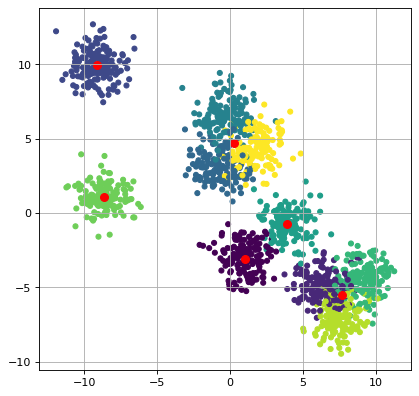

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 6
Random Index score      : 0.5550399056900982
Completeness score      : 0.9710471045994921
Mutual Information score: 0.8091739996849151


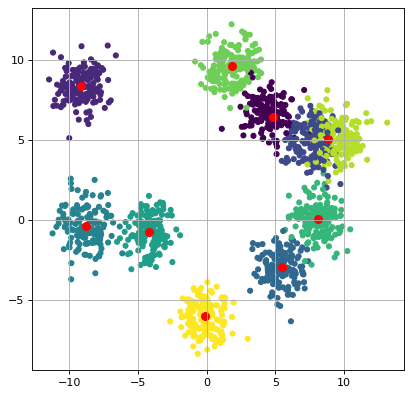

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 9
Random Index score      : 0.8559220934953699
Completeness score      : 0.9475060855172105
Mutual Information score: 0.919967599591752


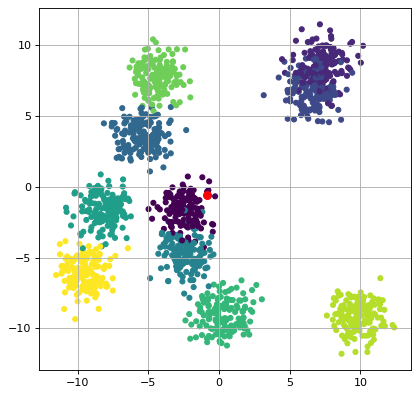

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 1
Random Index score      : 0.0
Completeness score      : 1.0
Mutual Information score: 0.0


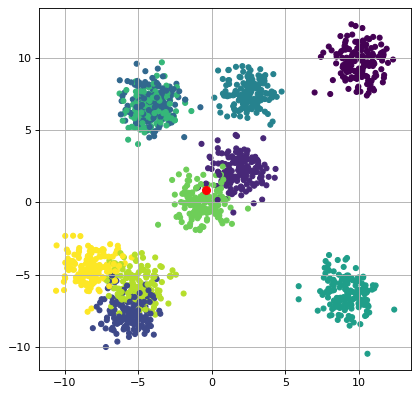

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 1
Random Index score      : 0.0
Completeness score      : 1.0
Mutual Information score: 0.0


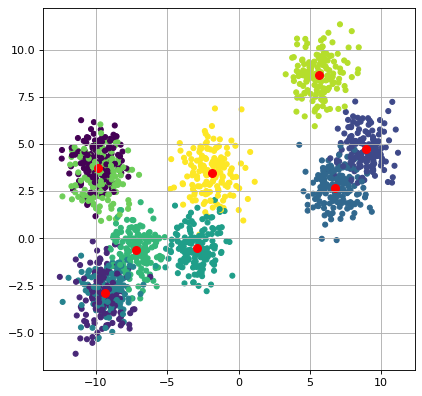

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 8
Random Index score      : 0.738670716549838
Completeness score      : 0.9137655778620634
Mutual Information score: 0.8557697596569753


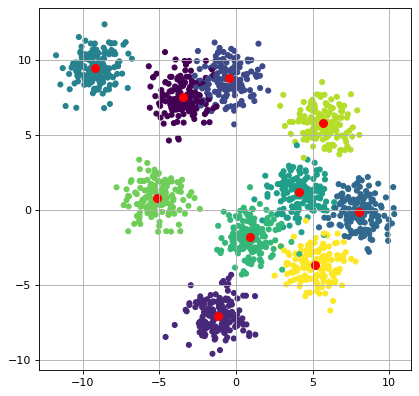

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 10
Random Index score      : 0.941742273485142
Completeness score      : 0.9473051910496303
Mutual Information score: 0.9465985222807707


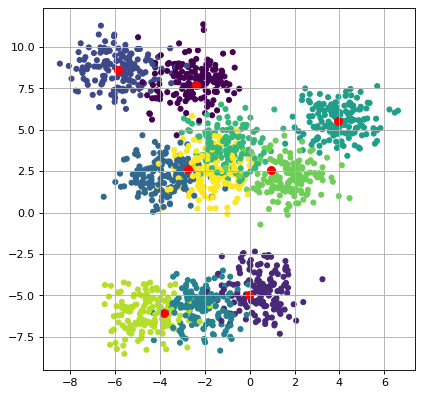

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 7
Random Index score      : 0.597134170370239
Completeness score      : 0.8440651208660614
Mutual Information score: 0.762197519857465


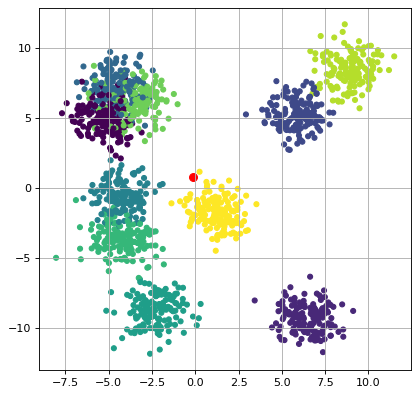

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 1
Random Index score      : 0.0
Completeness score      : 1.0
Mutual Information score: 0.0


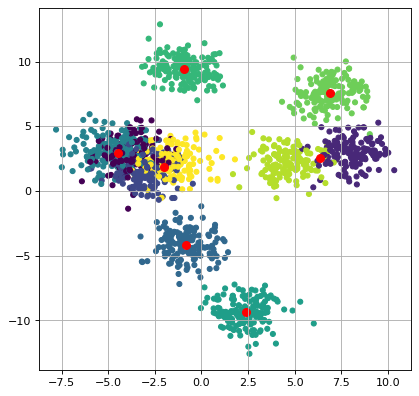

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 7
Random Index score      : 0.6425571577556556
Completeness score      : 0.9061193228964329
Mutual Information score: 0.8147972011178918


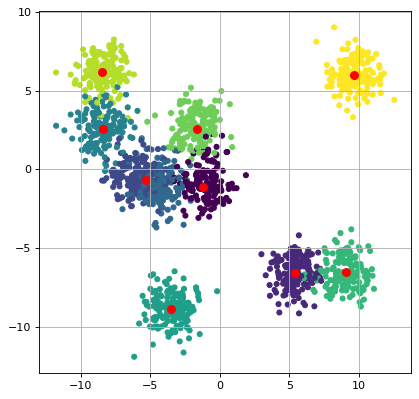

blobs dataset with shape : (1500, 2)
True K = 10, Estimated K = 9
Random Index score      : 0.8185524785994418
Completeness score      : 0.9191651353552398
Mutual Information score: 0.891049823913762


In [4]:
# blob datasets
num_centers = 10

for trial in range(10):
    data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, n_features=2, cluster_std=1)

    model = XMeans(K_init=1, identical_spherical_normal_distributions=True, split_centroids_mannually=True).fit(data)
    visualize(data, labels, model)

    # reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    print(f'blobs dataset with shape : {data.shape}')
    print(f'True K = {num_centers}, Estimated K = {model.K}')
#     print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
    print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
    print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
    print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')

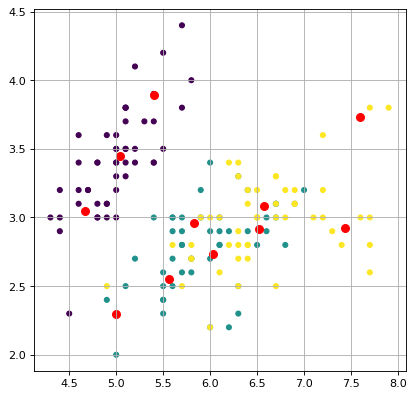

iris dataset with shape : (150, 4)
Silhouette score        : 0.30037535824203204
Random Index score      : 0.3461836366308787
Completeness score      : 0.4458275405304349
Mutual Information score: 0.5842877429233967


In [5]:
# iris dataset
dataset = datasets.load_iris()
data = dataset.data
labels = dataset.target

model = XMeans(identical_spherical_normal_distributions=True).fit(data)
visualize(data, labels, model)

print(f'iris dataset with shape : {data.shape}')
print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')